In [15]:
import pandas as pd
import numpy as np

# --- Step 1: Data Loading and Preparation ---
file_url = 'https://www.statlearning.com/s/Advertising.csv'
data = pd.read_csv(file_url, index_col=0)
feature_columns = ['TV', 'radio', 'newspaper'] 
X_multi = data[feature_columns]
y_multi = data['sales'] 

# --- Step 2: Feature Scaling (The Crucial Step!) ---
X_mean = X_multi.mean()
X_std = X_multi.std()
X_scaled = (X_multi - X_mean) / X_std

# --- Step 3: Prepare Data for Training ---
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled.values]
y_np = y_multi.values.reshape(-1, 1)
np.random.seed(42)
theta = np.random.randn(4, 1) 
learning_rate = 0.01 
iterations = 1000

# --- Step 4: Define Core Functions ---
def compute_cost(X_b, y, theta):
    m = len(y)
    predictions = X_b.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

def gradient_descent(X_b, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []
    for i in range(iterations):
        predictions = X_b.dot(theta)
        errors = predictions - y
        gradient = (1/m) * X_b.T.dot(errors)
        theta = theta - learning_rate * gradient
        cost_history.append(compute_cost(X_b, y, theta))
    return theta, cost_history

# --- Step 5: Train the Model ---
final_theta, cost_history = gradient_descent(X_b, y_np, theta, learning_rate, iterations)

# --- Step 6: Evaluate the Correctly Trained Model ---
y_predictions = X_b.dot(final_theta)
def r_squared_corrected(y_true, y_pred):
    """Calculates the R-squared value correctly by flattening arrays."""
    # Flatten both arrays to ensure they are 1D
    y_true_flat = y_true.flatten()
    y_pred_flat = y_pred.flatten()
    
    # Calculate the mean of the true y values
    y_mean = np.mean(y_true_flat)
    
    # Calculate SST and SSR
    sst = np.sum((y_true_flat - y_mean)**2)
    ssr = np.sum((y_true_flat - y_pred_flat)**2)
    
    # Calculate R-squared
    r2 = 1 - (ssr / sst)
    return r2
r2_score = r_squared_corrected(y_np, y_predictions) # Using our function from before

print(f"Final Cost (MSE): {cost_history[-1]:.4f}")
print(f"Corrected R-squared Score: {r2_score:.4f}")

Final Cost (MSE): 1.3921
Corrected R-squared Score: 0.8972


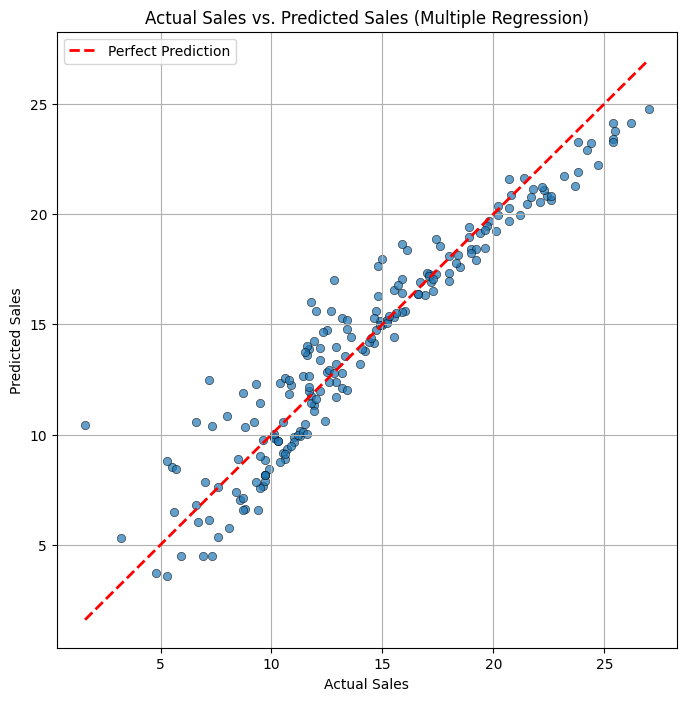

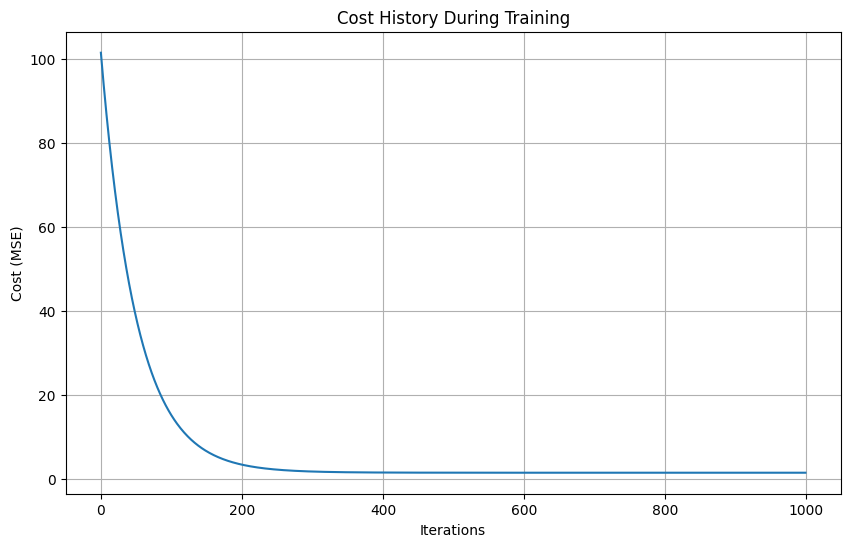

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Visualization 1: Actual vs. Predicted Plot ---

# We need the predictions from our successfully trained model
y_predictions = X_b.dot(final_theta)

plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_np.flatten(), y=y_predictions.flatten(), edgecolor='k', alpha=0.7)

# Add the "perfect prediction" line
min_val = min(y_np.min(), y_predictions.min())
max_val = max(y_np.max(), y_predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')

plt.title('Actual Sales vs. Predicted Sales (Multiple Regression)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.legend()
plt.show()


# --- Visualization 2: Cost History Plot ---

plt.figure(figsize=(10, 6))
plt.plot(range(len(cost_history)), cost_history)
plt.title('Cost History During Training')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.grid(True)
plt.show()